<a href="https://colab.research.google.com/github/s2ul2/jpx-dokyo-stock-prices-analysis/blob/main/EDA_%EC%84%9C%EC%A7%84%EC%8A%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/AI딥러닝_프로젝트/데이터/jpx-tokyo-stock-exchange-prediction/train_files

/content/drive/MyDrive/AI딥러닝_프로젝트/데이터/jpx-tokyo-stock-exchange-prediction/train_files


In [ ]:
%ls

financials.csv  secondary_stock_prices.csv  stock_prices.csv
options.csv     stock_prices2.csv           trades.csv


In [ ]:
import pandas as pd
import numpy as np
import warnings
import os
from functools import reduce
warnings.filterwarnings(action='ignore')

import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
sns.set_palette("pastel")
%matplotlib inline

In [ ]:
df_prices = pd.read_csv('stock_prices.csv')
df_prices.head()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026


In [ ]:
import numpy as np
np.sqrt(19564
)

139.8713694792469

In [ ]:
8/np.sqrt(19564)

0.0571954076791032

In [ ]:
134*146

19564

In [ ]:
code_lst = df_prices['SecuritiesCode'].unique()

In [ ]:
df_prices.columns

Index(['RowId', 'Date', 'SecuritiesCode', 'Open', 'High', 'Low', 'Close',
       'Volume', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag',
       'Target'],
      dtype='object')

In [ ]:
df_prices = df_prices.drop('ExpectedDividend', axis = 1)
df_prices.head(3)

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,False,0.006154


In [ ]:
new_price = df_prices.iloc[:1, :]
for i in list(set(df_prices['SecuritiesCode'])):
    data = df_prices.loc[df_prices.SecuritiesCode==i].reset_index()
    data['bfill'] = data[['Close']].copy().fillna(method='bfill')
    data['ffill'] = data[['Close']].copy().fillna(method='ffill')
    data['CloseMean']=np.nanmean(np.vstack([np.array(data['ffill']),np.array(data['bfill'])]),axis=0)
    data.drop(['bfill','ffill'],axis=1,inplace=True)
    new_price = pd.concat([new_price, data], ignore_index = True)
new_price

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,SupervisionFlag,Target,index,CloseMean
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,False,0.000730,NaN,NaN
1,20170104_8194,2017-01-04,8194,3325.0,3390.0,3300.0,3380.0,36100,1.0,False,-0.002963,1483.0,3380.0
2,20170105_8194,2017-01-05,8194,3395.0,3420.0,3360.0,3375.0,19400,1.0,False,-0.020802,3348.0,3375.0
3,20170106_8194,2017-01-06,8194,3365.0,3385.0,3335.0,3365.0,23000,1.0,False,-0.006070,5213.0,3365.0
4,20170110_8194,2017-01-10,8194,3350.0,3360.0,3290.0,3295.0,42400,1.0,False,-0.022901,7078.0,3295.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332527,20211129_8185,2021-11-29,8185,735.0,736.0,716.0,716.0,127800,1.0,False,0.022792,2324136.0,716.0
2332528,20211130_8185,2021-11-30,8185,721.0,733.0,701.0,702.0,110000,1.0,False,-0.012535,2326136.0,702.0
2332529,20211201_8185,2021-12-01,8185,700.0,726.0,695.0,718.0,119500,1.0,False,0.033850,2328136.0,718.0
2332530,20211202_8185,2021-12-02,8185,712.0,721.0,709.0,709.0,106200,1.0,False,0.005457,2330136.0,709.0


In [ ]:
new_price = new_price.iloc[1:, :] # 임의로 삽입했던 첫번째 행 삭제
new_price[new_price['Close'] != new_price['CloseMean']] # 7608개 다름 (즉 close의 nan값들이 모두 채워짐)

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,SupervisionFlag,Target,index,CloseMean
914,20201001_8194,2020-10-01,8194,NaN,NaN,NaN,NaN,0,1.0,False,-0.006452,1756634.0,4747.5
2116,20201001_8198,2020-10-01,8198,NaN,NaN,NaN,NaN,0,1.0,False,0.005945,1756635.0,2531.0
3318,20201001_8200,2020-10-01,8200,NaN,NaN,NaN,NaN,0,1.0,False,-0.007073,1756636.0,2563.0
4520,20201001_8202,2020-10-01,8202,NaN,NaN,NaN,NaN,0,1.0,False,0.043956,1756637.0,185.0
5722,20201001_8203,2020-10-01,8203,NaN,NaN,NaN,NaN,0,1.0,False,0.008197,1756638.0,904.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2327435,20201001_8173,2020-10-01,8173,NaN,NaN,NaN,NaN,0,1.0,False,0.015026,1756629.0,2574.0
2328637,20201001_8174,2020-10-01,8174,NaN,NaN,NaN,NaN,0,1.0,False,0.015228,1756630.0,5295.0
2329839,20201001_8179,2020-10-01,8179,NaN,NaN,NaN,NaN,0,1.0,False,0.025516,1756631.0,1830.0
2331041,20201001_8182,2020-10-01,8182,NaN,NaN,NaN,NaN,0,1.0,False,0.007780,1756632.0,1952.5


In [ ]:
new_price.isna().sum()

RowId                  0
Date                   0
SecuritiesCode         0
Open                7608
High                7608
Low                 7608
Close               7608
Volume                 0
AdjustmentFactor       0
SupervisionFlag        0
Target               238
index                  0
CloseMean              0
dtype: int64

In [ ]:
new_price = new_price.reset_index()
new_price

,level_0,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,SupervisionFlag,Target,index,CloseMean
0,1,20170104_8194,2017-01-04,8194,3325.0,3390.0,3300.0,3380.0,36100,1.0,False,-0.002963,1483.0,3380.0
1,2,20170105_8194,2017-01-05,8194,3395.0,3420.0,3360.0,3375.0,19400,1.0,False,-0.020802,3348.0,3375.0
2,3,20170106_8194,2017-01-06,8194,3365.0,3385.0,3335.0,3365.0,23000,1.0,False,-0.006070,5213.0,3365.0
3,4,20170110_8194,2017-01-10,8194,3350.0,3360.0,3290.0,3295.0,42400,1.0,False,-0.022901,7078.0,3295.0
4,5,20170111_8194,2017-01-11,8194,3330.0,3330.0,3260.0,3275.0,20200,1.0,False,0.054688,8943.0,3275.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332526,2332527,20211129_8185,2021-11-29,8185,735.0,736.0,716.0,716.0,127800,1.0,False,0.022792,2324136.0,716.0
2332527,2332528,20211130_8185,2021-11-30,8185,721.0,733.0,701.0,702.0,110000,1.0,False,-0.012535,2326136.0,702.0
2332528,2332529,20211201_8185,2021-12-01,8185,700.0,726.0,695.0,718.0,119500,1.0,False,0.033850,2328136.0,718.0
2332529,2332530,20211202_8185,2021-12-02,8185,712.0,721.0,709.0,709.0,106200,1.0,False,0.005457,2330136.0,709.0


In [ ]:
new_price = new_price.drop('level_0', axis = 1)
new_price

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,SupervisionFlag,Target,index,CloseMean
0,20170104_8194,2017-01-04,8194,3325.0,3390.0,3300.0,3380.0,36100,1.0,False,-0.002963,1483.0,3380.0
1,20170105_8194,2017-01-05,8194,3395.0,3420.0,3360.0,3375.0,19400,1.0,False,-0.020802,3348.0,3375.0
2,20170106_8194,2017-01-06,8194,3365.0,3385.0,3335.0,3365.0,23000,1.0,False,-0.006070,5213.0,3365.0
3,20170110_8194,2017-01-10,8194,3350.0,3360.0,3290.0,3295.0,42400,1.0,False,-0.022901,7078.0,3295.0
4,20170111_8194,2017-01-11,8194,3330.0,3330.0,3260.0,3275.0,20200,1.0,False,0.054688,8943.0,3275.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332526,20211129_8185,2021-11-29,8185,735.0,736.0,716.0,716.0,127800,1.0,False,0.022792,2324136.0,716.0
2332527,20211130_8185,2021-11-30,8185,721.0,733.0,701.0,702.0,110000,1.0,False,-0.012535,2326136.0,702.0
2332528,20211201_8185,2021-12-01,8185,700.0,726.0,695.0,718.0,119500,1.0,False,0.033850,2328136.0,718.0
2332529,20211202_8185,2021-12-02,8185,712.0,721.0,709.0,709.0,106200,1.0,False,0.005457,2330136.0,709.0


In [ ]:
 # 구한 CloseMean으로 Target 구하기
new_price2 = new_price.iloc[:1, :] # 임의의 행 삽입 (추후 삭제)
for code in code_lst:
    temp_df = new_price.query('SecuritiesCode == @code')
    temp_df["Close_shift1"] = temp_df["CloseMean"].shift(-1)
    temp_df["Close_shift2"] = temp_df["CloseMean"].shift(-2)
    for date in temp_df['Date']:
        if date.isin(['2021-12-02', '2021-12-03']) == True:
            temp_df['target2'] = temp_df['Target'] # 마지막 두 날은 그냥 Target값으로 채우기
    else:
        temp_df["target2"] = (temp_df["Close_shift2"] - temp_df["Close_shift1"]) / temp_df["Close_shift1"]
    new_price2 = pd.concat([new_price2, temp_df], ignore_index = True)
new_price2

ValueError: ignored

In [ ]:
new_price['Date'].isin(['2021-12-02','2021-12-03'])

0          False
1          False
2          False
3          False
4          False
           ...  
2332526    False
2332527    False
2332528    False
2332529     True
2332530     True
Name: Date, Length: 2332531, dtype: bool

In [ ]:
new_price2 = new_price2.iloc[1:, :].reset_index()
new_price2

,level_0,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,SupervisionFlag,Target,index,CloseMean,Close_shift1,Close_shift2,target2
0,1,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,False,0.000730,0.0,2742.0,2738.0,2740.0,0.000730
1,2,20170105_1301,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,1.0,False,0.002920,1865.0,2738.0,2740.0,2748.0,0.002920
2,3,20170106_1301,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,1.0,False,-0.001092,3730.0,2740.0,2748.0,2745.0,-0.001092
3,4,20170110_1301,2017-01-10,1301,2745.0,2754.0,2735.0,2748.0,24200,1.0,False,-0.005100,5595.0,2748.0,2745.0,2731.0,-0.005100
4,5,20170111_1301,2017-01-11,1301,2748.0,2752.0,2737.0,2745.0,9300,1.0,False,-0.003295,7460.0,2745.0,2731.0,2722.0,-0.003295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332526,2332527,20211129_4169,2021-11-29,4169,6970.0,7350.0,6970.0,6970.0,772500,1.0,False,0.009972,2323102.0,6970.0,7020.0,7090.0,0.009972
2332527,2332528,20211130_4169,2021-11-30,4169,6770.0,7240.0,6410.0,7020.0,887400,1.0,False,0.060649,2325102.0,7020.0,7090.0,7520.0,0.060649
2332528,2332529,20211201_4169,2021-12-01,4169,7190.0,7380.0,6670.0,7090.0,496800,1.0,False,-0.039894,2327102.0,7090.0,7520.0,7220.0,-0.039894
2332529,2332530,20211202_4169,2021-12-02,4169,7160.0,7870.0,7110.0,7520.0,783000,1.0,False,-0.127424,2329102.0,7520.0,7220.0,NaN,NaN


In [ ]:
new_price2 = new_price2.drop('level_0', axis = 1)
new_price2.sample(10)

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,SupervisionFlag,Target,index,CloseMean,Close_shift1,Close_shift2,target2
2179928,20191118_9790,2019-11-18,9790,3670.0,3730.0,3650.0,3720.0,178400,1.0,False,-0.020000,1340873.0,3720.0,3750.0,3675.0,-0.020000
1451638,20200522_7201,2020-05-22,7201,384.0,388.3,370.3,373.0,17161400,1.0,False,0.050974,1580259.0,373.0,374.7,393.8,0.050974
2093589,20200923_9508,2020-09-23,9508,970.0,971.0,957.0,970.0,1280200,1.0,False,0.010384,1744987.0,970.0,963.0,973.0,0.010384
1476159,20170605_7254,2017-06-05,7254,303.0,303.0,297.0,303.0,37300,1.0,False,-0.003333,193944.0,303.0,300.0,299.0,-0.003333
681211,20200812_4301,2020-08-12,4301,1999.0,2051.0,1999.0,2042.0,44700,1.0,False,-0.003605,1688232.0,2042.0,2219.0,2211.0,-0.003605
1534480,20191224_7510,2019-12-24,7510,1477.0,1492.0,1475.0,1490.0,5700,1.0,False,0.013289,1391217.0,1490.0,1505.0,1525.0,0.013289
1227226,20211111_6473,2021-11-11,6473,1011.0,1038.0,1011.0,1026.0,1092900,1.0,False,0.017094,2301628.0,1026.0,1053.0,1071.0,0.017094
1362364,20190115_6866,2019-01-15,6866,3390.0,3555.0,3355.0,3515.0,19900,1.0,False,0.007133,944147.0,3515.0,3505.0,3530.0,0.007133
1396238,20191206_6952,2019-12-06,6952,2097.0,2115.0,2091.0,2115.0,794800,1.0,False,0.023753,1367559.0,2115.0,2105.0,2155.0,0.023753
1074975,20180730_6095,2018-07-30,6095,1600.0,1600.0,1480.0,1483.0,235400,1.0,False,0.021825,730870.0,1483.0,1512.0,1545.0,0.021825


In [ ]:
new_price2.isna().sum()

RowId                  0
Date                   0
SecuritiesCode         0
Open                7608
High                7608
Low                 7608
Close               7608
Volume                 0
AdjustmentFactor       0
SupervisionFlag        0
Target               238
index                  0
CloseMean              0
Close_shift1        2000
Close_shift2        4000
target2             4000
dtype: int64

In [ ]:
new_price2[new_price2['target2'].isna() == True]

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,SupervisionFlag,Target,index,CloseMean,Close_shift1,Close_shift2,target2
1200,20211202_1301,2021-12-02,1301,2949.0,2973.0,2933.0,2933.0,15200,1.0,False,-0.003689,2328531.0,2933.0,2982.0,NaN,NaN
1201,20211203_1301,2021-12-03,1301,2983.0,2983.0,2965.0,2982.0,11400,1.0,False,0.031639,2330531.0,2982.0,NaN,NaN,NaN
2402,20211202_1332,2021-12-02,1332,566.0,577.0,565.0,573.0,1525800,1.0,False,0.006838,2328532.0,573.0,585.0,NaN,NaN
2403,20211203_1332,2021-12-03,1332,579.0,585.0,570.0,585.0,1195500,1.0,False,-0.056027,2330532.0,585.0,NaN,NaN,NaN
3604,20211202_1333,2021-12-02,1333,2276.0,2314.0,2267.0,2303.0,157000,1.0,False,0.008058,2328533.0,2303.0,2358.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332065,20211203_4168,2021-12-03,4168,4395.0,4480.0,4285.0,4440.0,58700,1.0,False,0.027363,2331101.0,4440.0,NaN,NaN,NaN
2332297,20211202_7342,2021-12-02,7342,2837.0,2840.0,2559.0,2584.0,1635200,1.0,False,-0.046579,2329891.0,2584.0,2748.0,NaN,NaN
2332298,20211203_7342,2021-12-03,7342,2649.0,2755.0,2600.0,2748.0,855000,1.0,False,0.005725,2331891.0,2748.0,NaN,NaN,NaN
2332529,20211202_4169,2021-12-02,4169,7160.0,7870.0,7110.0,7520.0,783000,1.0,False,-0.127424,2329102.0,7520.0,7220.0,NaN,NaN


In [ ]:
new_price2.to_csv('stock_prices2.csv')

In [ ]:
df3 = pd.read_csv('stock_prices2.csv')
df3

,Unnamed: 0,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,SupervisionFlag,Target,index,CloseMean,Close_shift1,Close_shift2,target2
0,0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,False,0.000730,0.0,2742.0,2738.0,2740.0,0.000730
1,1,20170105_1301,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,1.0,False,0.002920,1865.0,2738.0,2740.0,2748.0,0.002920
2,2,20170106_1301,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,1.0,False,-0.001092,3730.0,2740.0,2748.0,2745.0,-0.001092
3,3,20170110_1301,2017-01-10,1301,2745.0,2754.0,2735.0,2748.0,24200,1.0,False,-0.005100,5595.0,2748.0,2745.0,2731.0,-0.005100
4,4,20170111_1301,2017-01-11,1301,2748.0,2752.0,2737.0,2745.0,9300,1.0,False,-0.003295,7460.0,2745.0,2731.0,2722.0,-0.003295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332526,2332526,20211129_4169,2021-11-29,4169,6970.0,7350.0,6970.0,6970.0,772500,1.0,False,0.009972,2323102.0,6970.0,7020.0,7090.0,0.009972
2332527,2332527,20211130_4169,2021-11-30,4169,6770.0,7240.0,6410.0,7020.0,887400,1.0,False,0.060649,2325102.0,7020.0,7090.0,7520.0,0.060649
2332528,2332528,20211201_4169,2021-12-01,4169,7190.0,7380.0,6670.0,7090.0,496800,1.0,False,-0.039894,2327102.0,7090.0,7520.0,7220.0,-0.039894
2332529,2332529,20211202_4169,2021-12-02,4169,7160.0,7870.0,7110.0,7520.0,783000,1.0,False,-0.127424,2329102.0,7520.0,7220.0,NaN,NaN


In [ ]:
df3['target3'] = np.where(pd.notnull(df3['target2']) == True, df3['target2'], df3['Target'])
df3

,Unnamed: 0,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,SupervisionFlag,Target,index,CloseMean,Close_shift1,Close_shift2,target2,target3
0,0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,False,0.000730,0.0,2742.0,2738.0,2740.0,0.000730,0.000730
1,1,20170105_1301,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,1.0,False,0.002920,1865.0,2738.0,2740.0,2748.0,0.002920,0.002920
2,2,20170106_1301,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,1.0,False,-0.001092,3730.0,2740.0,2748.0,2745.0,-0.001092,-0.001092
3,3,20170110_1301,2017-01-10,1301,2745.0,2754.0,2735.0,2748.0,24200,1.0,False,-0.005100,5595.0,2748.0,2745.0,2731.0,-0.005100,-0.005100
4,4,20170111_1301,2017-01-11,1301,2748.0,2752.0,2737.0,2745.0,9300,1.0,False,-0.003295,7460.0,2745.0,2731.0,2722.0,-0.003295,-0.003295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332526,2332526,20211129_4169,2021-11-29,4169,6970.0,7350.0,6970.0,6970.0,772500,1.0,False,0.009972,2323102.0,6970.0,7020.0,7090.0,0.009972,0.009972
2332527,2332527,20211130_4169,2021-11-30,4169,6770.0,7240.0,6410.0,7020.0,887400,1.0,False,0.060649,2325102.0,7020.0,7090.0,7520.0,0.060649,0.060649
2332528,2332528,20211201_4169,2021-12-01,4169,7190.0,7380.0,6670.0,7090.0,496800,1.0,False,-0.039894,2327102.0,7090.0,7520.0,7220.0,-0.039894,-0.039894
2332529,2332529,20211202_4169,2021-12-02,4169,7160.0,7870.0,7110.0,7520.0,783000,1.0,False,-0.127424,2329102.0,7520.0,7220.0,NaN,NaN,-0.127424


In [ ]:
df3.isna().sum()

Unnamed: 0             0
RowId                  0
Date                   0
SecuritiesCode         0
Open                7608
High                7608
Low                 7608
Close               7608
Volume                 0
AdjustmentFactor       0
SupervisionFlag        0
Target               238
index                  0
CloseMean              0
Close_shift1        2000
Close_shift2        4000
target2             4000
target3                0
dtype: int64

In [ ]:
df3 = df3.drop(['Unnamed: 0', 'Close', 'Close_shift1', 'Close_shift2', 'target2', 'Target'], axis = 1)
df3 = df3.rename(columns = {'target3' : 'new_target'})
df3

,RowId,Date,SecuritiesCode,Open,High,Low,Volume,AdjustmentFactor,SupervisionFlag,index,CloseMean,new_target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,31400,1.0,False,0.0,2742.0,0.000730
1,20170105_1301,2017-01-05,1301,2743.0,2747.0,2735.0,17900,1.0,False,1865.0,2738.0,0.002920
2,20170106_1301,2017-01-06,1301,2734.0,2744.0,2720.0,19900,1.0,False,3730.0,2740.0,-0.001092
3,20170110_1301,2017-01-10,1301,2745.0,2754.0,2735.0,24200,1.0,False,5595.0,2748.0,-0.005100
4,20170111_1301,2017-01-11,1301,2748.0,2752.0,2737.0,9300,1.0,False,7460.0,2745.0,-0.003295
...,...,...,...,...,...,...,...,...,...,...,...,...
2332526,20211129_4169,2021-11-29,4169,6970.0,7350.0,6970.0,772500,1.0,False,2323102.0,6970.0,0.009972
2332527,20211130_4169,2021-11-30,4169,6770.0,7240.0,6410.0,887400,1.0,False,2325102.0,7020.0,0.060649
2332528,20211201_4169,2021-12-01,4169,7190.0,7380.0,6670.0,496800,1.0,False,2327102.0,7090.0,-0.039894
2332529,20211202_4169,2021-12-02,4169,7160.0,7870.0,7110.0,783000,1.0,False,2329102.0,7520.0,-0.127424


In [ ]:
df3.to_csv('stock_prices2.csv')

In [ ]:
xnew_no_price = new_price[new_price['Low'].isna()]
new_no_price

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,SupervisionFlag,Target
482003,20170104_3540,2017-01-04,3540,NaN,NaN,NaN,NaN,0,1.0,False,NaN
482004,20170105_3540,2017-01-05,3540,NaN,NaN,NaN,NaN,0,1.0,False,NaN
482005,20170106_3540,2017-01-06,3540,NaN,NaN,NaN,NaN,0,1.0,False,NaN
482006,20170110_3540,2017-01-10,3540,NaN,NaN,NaN,NaN,0,1.0,False,NaN
482007,20170111_3540,2017-01-11,3540,NaN,NaN,NaN,NaN,0,1.0,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2329573,20201002_2987,2020-10-02,2987,NaN,NaN,NaN,NaN,0,1.0,False,NaN
2329574,20201005_2987,2020-10-05,2987,NaN,NaN,NaN,NaN,0,1.0,False,-0.153465
2331129,20201217_4165,2020-12-17,4165,NaN,NaN,NaN,NaN,0,1.0,False,-0.098093
2331365,20201218_4167,2020-12-18,4167,NaN,NaN,NaN,NaN,0,1.0,False,0.076566


* adjustment factor : 주식 분할이나 전환에 따른 가격 급락이 간혹 있기 때문에 가격 조정

In [ ]:
df_prices['SecuritiesCode'].nunique()

2000

In [ ]:
df_prices['Date'].unique()

array(['2017-01-04', '2017-01-05', '2017-01-06', ..., '2021-12-01',
       '2021-12-02', '2021-12-03'], dtype=object)

* stock 개수 : 2000개
* 기간 : 2017-01-04 ~ 2021-12-03 

change rate 공식

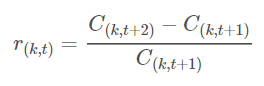

* the closing price (Close) of the next day and the next day 
* ranking the change rate for each of 2000 stocks.

In [ ]:
df_prices.isnull().sum() 

RowId                     0
Date                      0
SecuritiesCode            0
Open                   7608
High                   7608
Low                    7608
Close                  7608
Volume                    0
AdjustmentFactor          0
ExpectedDividend    2313666
SupervisionFlag           0
Target                  238
dtype: int64

In [ ]:
df_no_price = df_prices[df_prices['Low'].isna()]
df_no_price

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
401,20170104_3540,2017-01-04,3540,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN
1753,20170104_9539,2017-01-04,9539,NaN,NaN,NaN,NaN,0,1.0,NaN,False,-0.004149
2266,20170105_3540,2017-01-05,3540,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN
2511,20170105_4621,2017-01-05,4621,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.000000
4131,20170106_3540,2017-01-06,3540,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2330563,20211203_1787,2021-12-03,1787,NaN,NaN,NaN,NaN,0,1.0,NaN,False,-0.030351
2330786,20211203_2761,2021-12-03,2761,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.000000
2331453,20211203_5918,2021-12-03,5918,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.015625
2332336,20211203_9083,2021-12-03,9083,NaN,NaN,NaN,NaN,0,1.0,NaN,False,0.009615


In [ ]:
df_no_price['Date'].value_counts()

2020-10-01    1988
2017-03-16      15
2019-10-09      14
2019-04-04      14
2021-10-29      13
              ... 
2017-12-25       1
2017-12-26       1
2020-03-13       1
2018-01-04       1
2018-02-21       1
Name: Date, Length: 1175, dtype: int64

2020년 10월 1일은 거의 모든 주식 가격이 NA값 
* it's because of The Failure of Equity Trading System on October 1, 2020.

ExpectedDividend는 거의 모든 값이 결측치 --> 삭제

In [ ]:
df_prices = df_prices.drop('ExpectedDividend', axis = 1)
df_prices.head(3)

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,False,0.006154


In [ ]:
df_prices['AdjustmentFactor'].value_counts()

1.000000     2331801
0.500000         328
5.000000         113
10.000000        103
0.333333          59
2.000000          36
0.250000          33
0.200000          20
0.909091          10
0.833333           6
0.769231           6
0.666667           4
0.100000           3
0.952381           3
0.800000           2
0.142857           1
0.869565           1
4.000000           1
20.000000          1
Name: AdjustmentFactor, dtype: int64

In [ ]:
df3 = pd.DataFrame(df_prices[df_prices['Close'].isna() == True]['Date'].value_counts())
df3

,Date
2020-10-01,1988
2017-03-16,15
2019-10-09,14
2019-04-04,14
2021-10-29,13
...,...
2017-12-25,1
2017-12-26,1
2020-03-13,1
2018-01-04,1


In [ ]:
df4 = df3.reset_index().rename(columns = {'index' : 'date'})
df4.sort_values(by = 'date')

,date,Date
1001,2017-01-04,2
1053,2017-01-05,2
1115,2017-01-06,1
340,2017-01-10,6
781,2017-01-11,4
...,...,...
973,2021-11-29,2
341,2021-11-30,6
419,2021-12-01,5
763,2021-12-02,4


* RSI is a metric which has been found useful while studying movement of stock prices and is calculated.
* RSI의 증가는 주식에서 강세를 나타내는 반면, RSI의 감소는 가격을 낮추는 것으로 보인다.
* The RSI values are categorized in Low, Medium and High category. Looking at the RSI categories, it appears that when RSI is in medium range, the price movement is most favourable. RSI in higher range is sometimes an indication of impending correction.

In [ ]:
stock_list = pd.read_csv("/content/drive/MyDrive/AI딥러닝_프로젝트/데이터/jpx-tokyo-stock-exchange-prediction/stock_list.csv")
stock_list.head(3)

,SecuritiesCode,EffectiveDate,Name,Section/Products,NewMarketSegment,33SectorCode,33SectorName,17SectorCode,17SectorName,NewIndexSeriesSizeCode,NewIndexSeriesSize,TradeDate,Close,IssuedShares,MarketCapitalization,Universe0
0,1301,20211230,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,7,TOPIX Small 2,20211230.0,3080.0,1.092828e+07,3.365911e+10,True
1,1305,20211230,Daiwa ETF-TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2097.0,3.634636e+09,7.621831e+12,False
2,1306,20211230,NEXT FUNDS TOPIX Exchange Traded Fund,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2073.5,7.917718e+09,1.641739e+13,False


merge sector information with the stock price

In [ ]:
stock_list['Universe0']

0        True
1       False
2       False
3       False
4       False
        ...  
4412     True
4413    False
4414    False
4415     True
4416    False
Name: Universe0, Length: 4417, dtype: bool

In [ ]:
target_stock_list = stock_list[stock_list['Universe0']]

In [ ]:
sec_info = target_stock_list[['SecuritiesCode', '33SectorName', '17SectorName']]
df_prices = pd.merge(df_prices, sec_info, on='SecuritiesCode')
df_prices.head()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,SupervisionFlag,Target,33SectorName,17SectorName
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,False,0.000730,"Fishery, Agriculture and Forestry",FOODS
1,20170105_1301,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,1.0,False,0.002920,"Fishery, Agriculture and Forestry",FOODS
2,20170106_1301,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,1.0,False,-0.001092,"Fishery, Agriculture and Forestry",FOODS
3,20170110_1301,2017-01-10,1301,2745.0,2754.0,2735.0,2748.0,24200,1.0,False,-0.005100,"Fishery, Agriculture and Forestry",FOODS
4,20170111_1301,2017-01-11,1301,2748.0,2752.0,2737.0,2745.0,9300,1.0,False,-0.003295,"Fishery, Agriculture and Forestry",FOODS


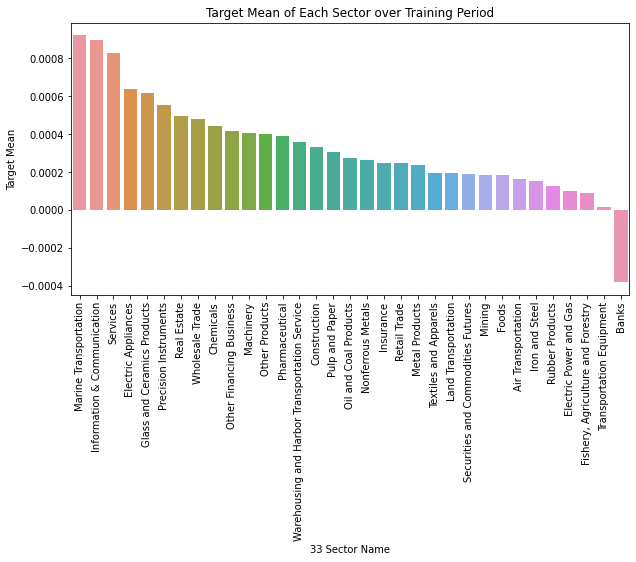

In [ ]:
# sector별 target mean
target_mean_33sec = df_prices.groupby(['33SectorName'])['Target'].mean()
target_mean_33sec.sort_values(inplace=True, ascending=False)

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=target_mean_33sec.index, y=target_mean_33sec.values, 
)
ax.set_title("Target Mean of Each Sector over Training Period")
ax.set_xlabel("33 Sector Name")
ax.tick_params(axis='x', rotation=90)
ax.set_ylabel("Target Mean")
plt.show()

* Marine Transportation has the highest target mean, followed by Information & Communication and Services. 
* the only sector having negative target mean is Banks.

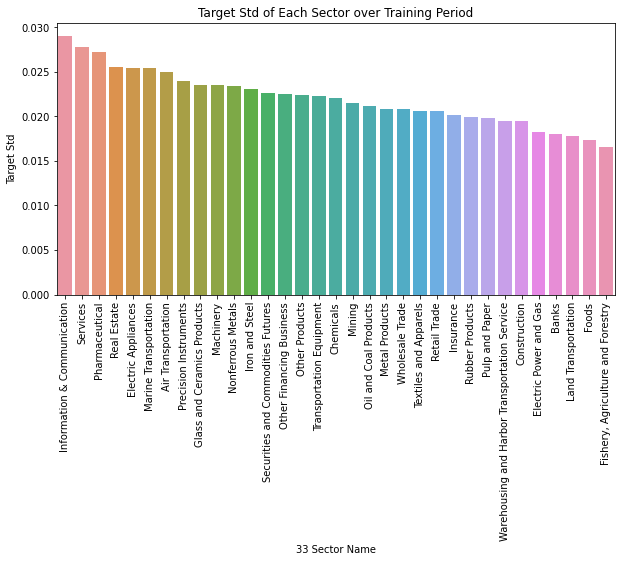

In [ ]:
# sector별 target std
target_std_33sec = df_prices.groupby(['33SectorName'])['Target'].std()
target_std_33sec.sort_values(inplace=True, ascending=False)

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=target_std_33sec.index, y=target_std_33sec.values)
ax.set_title("Target Std of Each Sector over Training Period")
ax.set_xlabel("33 Sector Name")
ax.tick_params(axis='x', rotation=90)
ax.set_ylabel("Target Std")
plt.show()

* Information & Communication has the highest target, followed by Services and Pharmaceutical. 
* Fishery, Agriculture and Forestry has the lowest.

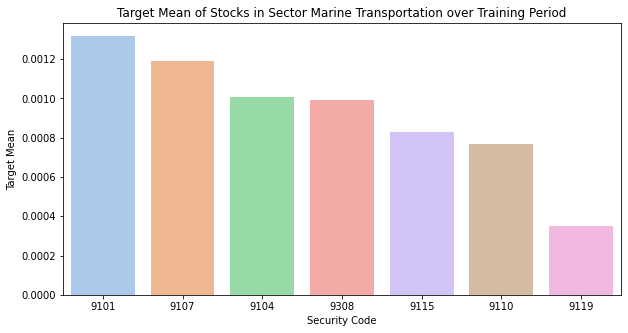

In [ ]:
# sector :  Marine Transportation
target_sector = 'Marine Transportation'
df_prices_marine = df_prices[df_prices['33SectorName'] == target_sector]
target_mean_marine = df_prices_marine.groupby(['SecuritiesCode'])['Target'].mean()
target_mean_marine.sort_values(inplace=True, ascending=False)

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=target_mean_marine.index, y=target_mean_marine.values, 
            order=target_mean_marine.index)
ax.set_title("Target Mean of Stocks in Sector Marine Transportation over Training Period")
ax.set_xlabel("Security Code")
ax.set_ylabel("Target Mean")
plt.show()

In [ ]:
import plotly.graph_objects as go
unique_dates = sorted(df_prices['Date'].unique())

fig = go.Figure()
for stock_code in [9101, 9107, 9104]:
    df_ = df_prices_marine[df_prices_marine['SecuritiesCode'] == stock_code]
    fig.add_trace(go.Scatter(x=unique_dates, y=df_['Target'], name=stock_code))
fig.update_layout(
    title=f"Target Series of 3 Best Stocks in Marine Transportation",
)
fig.show()

we can find that stocks within the same sector have a strong spatial dependency. 

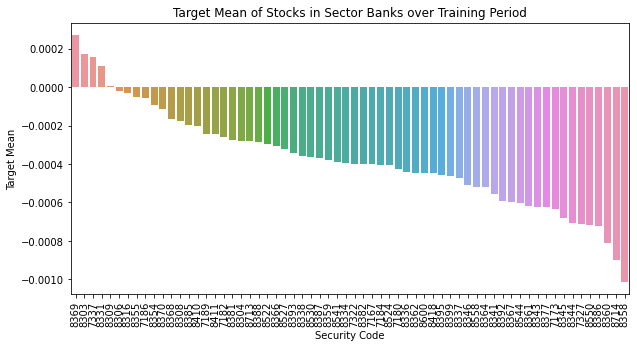

In [ ]:
# sector : banks
target_sector = 'Banks'
df_prices_banks = df_prices[df_prices['33SectorName'] == target_sector]
target_mean_banks = df_prices_banks.groupby(['SecuritiesCode'])['Target'].mean()
target_mean_banks.sort_values(inplace=True, ascending=False)

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=target_mean_banks.index, y=target_mean_banks.values, 
            order=target_mean_banks.index)
ax.set_title("Target Mean of Stocks in Sector Banks over Training Period")
ax.set_xlabel("Security Code")
ax.tick_params(axis='x', rotation=90)
ax.set_ylabel("Target Mean")
plt.show()

In [ ]:
fig = go.Figure()
for stock_code in [8360, 8714, 8358]:
    df_ = df_prices_banks[df_prices_banks['SecuritiesCode'] == stock_code]
    fig.add_trace(go.Scatter(x=unique_dates, y=df_['Target'], name=stock_code))
fig.update_layout(
    title=f"Target Series of 3 Worst Stocks in Banks",
)
fig.show()

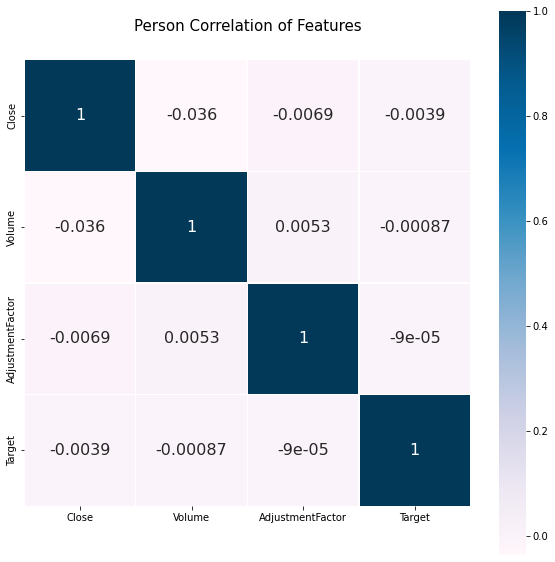

In [ ]:
# 전체 상관계수
heat_data = df_prices[['Close', 'Volume', 'AdjustmentFactor', 'Target']]

colormap = plt.cm.PuBu
plt.figure(figsize = (10, 10))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(heat_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})



거의 다 낮음..

In [ ]:
df_prices

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,SupervisionFlag,Target,33SectorName,17SectorName
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,False,0.000730,"Fishery, Agriculture and Forestry",FOODS
1,20170105_1301,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,1.0,False,0.002920,"Fishery, Agriculture and Forestry",FOODS
2,20170106_1301,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,1.0,False,-0.001092,"Fishery, Agriculture and Forestry",FOODS
3,20170110_1301,2017-01-10,1301,2745.0,2754.0,2735.0,2748.0,24200,1.0,False,-0.005100,"Fishery, Agriculture and Forestry",FOODS
4,20170111_1301,2017-01-11,1301,2748.0,2752.0,2737.0,2745.0,9300,1.0,False,-0.003295,"Fishery, Agriculture and Forestry",FOODS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332526,20211129_4169,2021-11-29,4169,6970.0,7350.0,6970.0,6970.0,772500,1.0,False,0.009972,Information & Communication,"IT & SERVICES, OTHERS"
2332527,20211130_4169,2021-11-30,4169,6770.0,7240.0,6410.0,7020.0,887400,1.0,False,0.060649,Information & Communication,"IT & SERVICES, OTHERS"
2332528,20211201_4169,2021-12-01,4169,7190.0,7380.0,6670.0,7090.0,496800,1.0,False,-0.039894,Information & Communication,"IT & SERVICES, OTHERS"
2332529,20211202_4169,2021-12-02,4169,7160.0,7870.0,7110.0,7520.0,783000,1.0,False,-0.127424,Information & Communication,"IT & SERVICES, OTHERS"


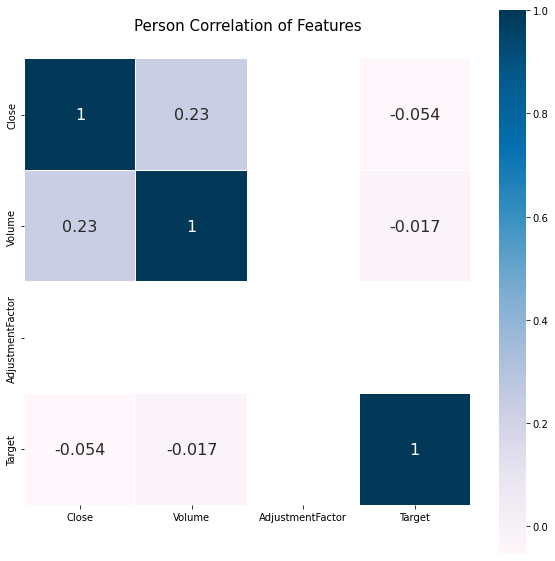

In [ ]:
#  SecuritiesCode 별로 상관계수
# SecuritiesCode = 1301
heat_1301 = df_prices[df_prices['SecuritiesCode'] == 1301][['Close', 'Volume', 'AdjustmentFactor', 'Target']]

colormap = plt.cm.PuBu
plt.figure(figsize = (10, 10))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(heat_1301.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})



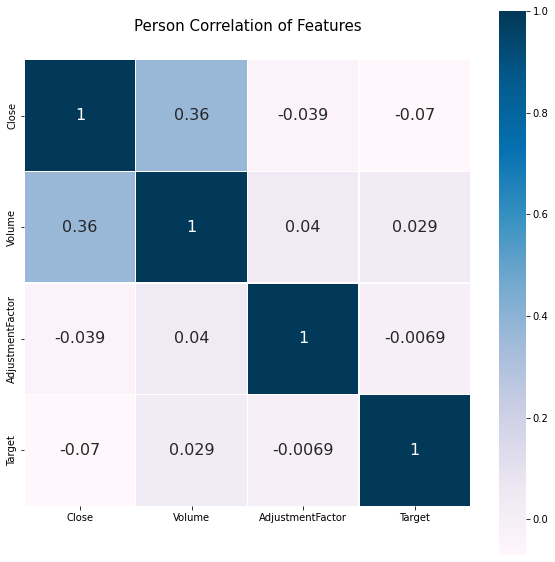

In [ ]:
#  SecuritiesCode 별로 상관계수
# SecuritiesCode = 4169
heat_4169 = df_prices[df_prices['SecuritiesCode'] == 4169][['Close', 'Volume', 'AdjustmentFactor', 'Target']]

colormap = plt.cm.PuBu
plt.figure(figsize = (10, 10))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(heat_4169.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})



# 시차 고려 상관계수

In [ ]:
for i in range(10):
    df_prices['trade_shift' + str(i)] = df_prices["Volume"].shift(-i)

In [ ]:
df_prices.head()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,SupervisionFlag,...,trade_shift0,trade_shift1,trade_shift2,trade_shift3,trade_shift4,trade_shift5,trade_shift6,trade_shift7,trade_shift8,trade_shift9
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,False,...,31400,17900.0,19900.0,24200.0,9300.0,28700.0,19400.0,20100.0,18400.0,12100.0
1,20170105_1301,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,1.0,False,...,17900,19900.0,24200.0,9300.0,28700.0,19400.0,20100.0,18400.0,12100.0,13200.0
2,20170106_1301,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,1.0,False,...,19900,24200.0,9300.0,28700.0,19400.0,20100.0,18400.0,12100.0,13200.0,26000.0
3,20170110_1301,2017-01-10,1301,2745.0,2754.0,2735.0,2748.0,24200,1.0,False,...,24200,9300.0,28700.0,19400.0,20100.0,18400.0,12100.0,13200.0,26000.0,12600.0
4,20170111_1301,2017-01-11,1301,2748.0,2752.0,2737.0,2745.0,9300,1.0,False,...,9300,28700.0,19400.0,20100.0,18400.0,12100.0,13200.0,26000.0,12600.0,21300.0


In [ ]:
df_prices.columns

Index(['RowId', 'Date', 'SecuritiesCode', 'Open', 'High', 'Low', 'Close',
       'Volume', 'AdjustmentFactor', 'SupervisionFlag', 'Target',
       '33SectorName', '17SectorName', 'trade_shift0', 'trade_shift1',
       'trade_shift2', 'trade_shift3', 'trade_shift4', 'trade_shift5',
       'trade_shift6', 'trade_shift7', 'trade_shift8', 'trade_shift9'],
      dtype='object')

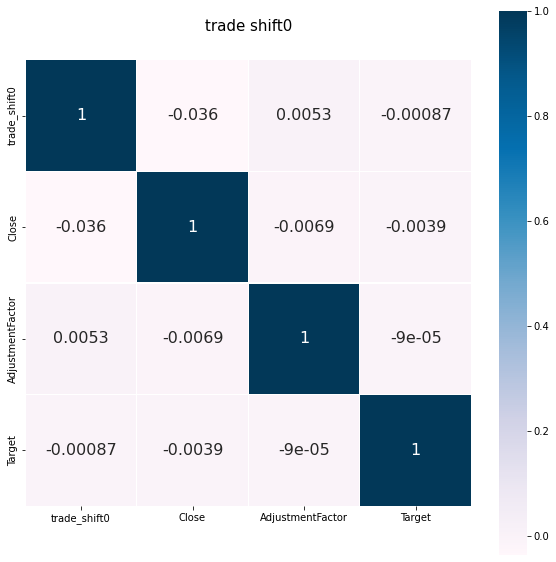

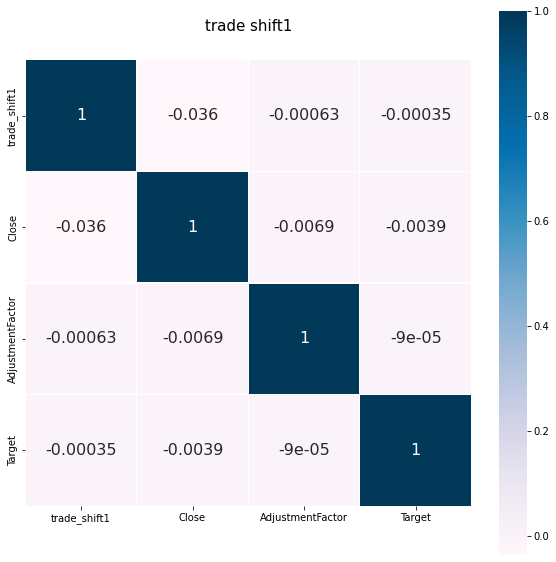

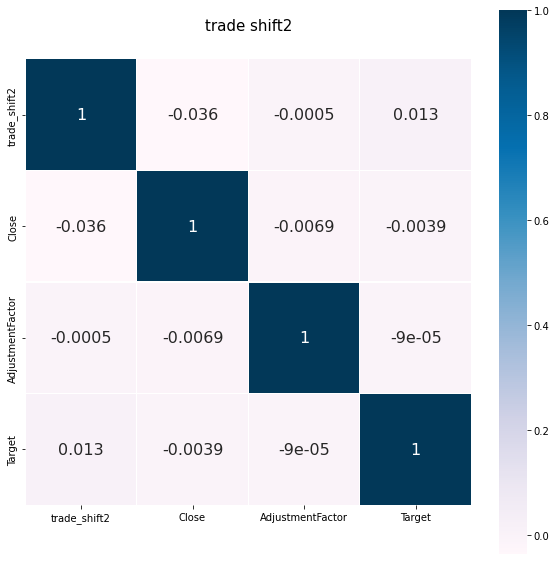

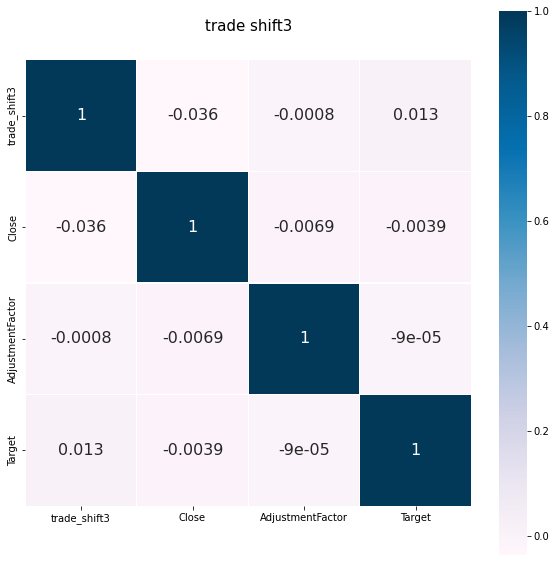

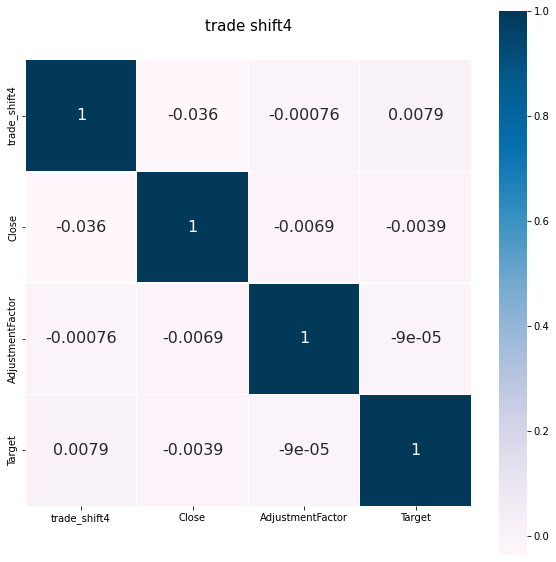

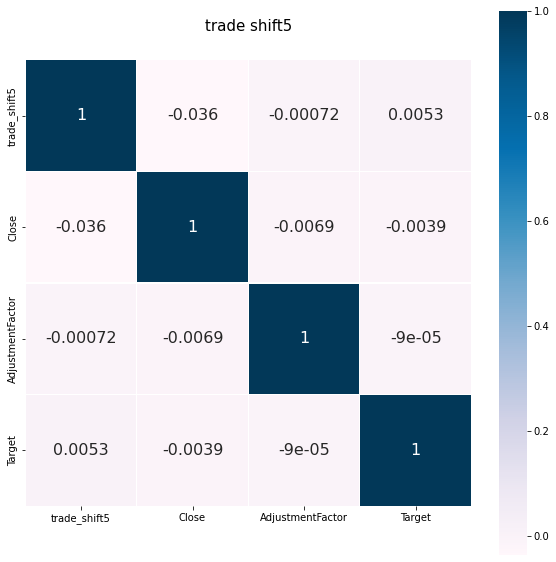

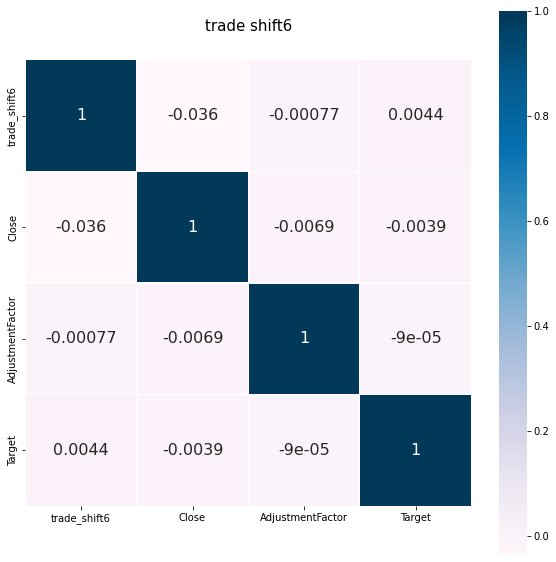

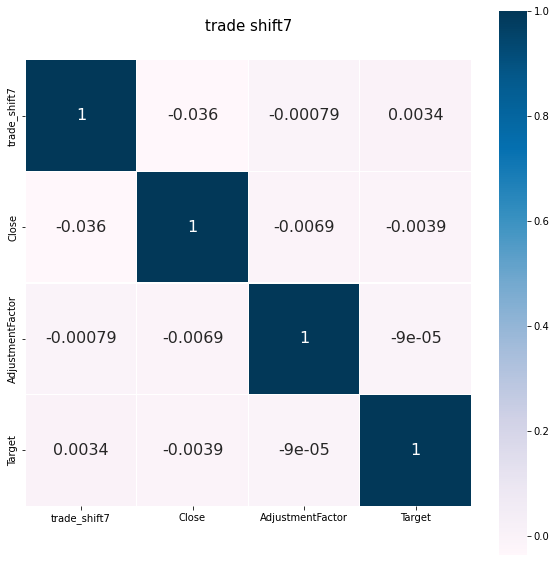

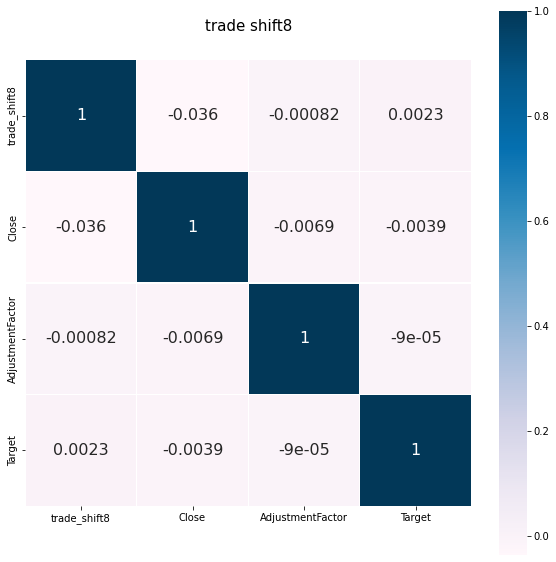

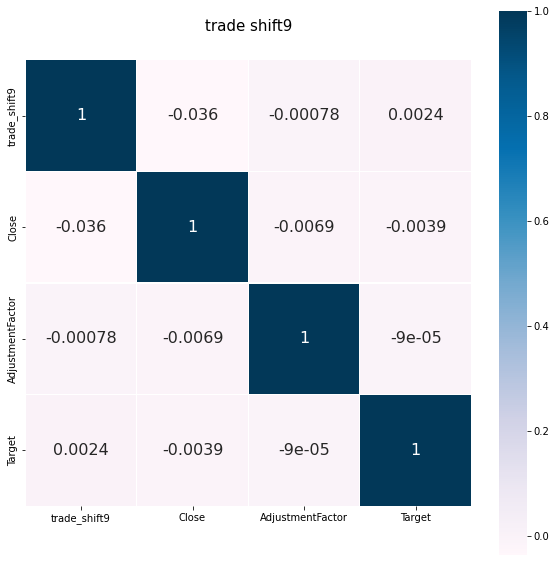

In [ ]:
# 시차 고려 전체 상관계수
for i in range(10):
    heat_data = df_prices[['trade_shift' + str(i), 'Close', 'AdjustmentFactor', 'Target']]

    colormap = plt.cm.PuBu
    plt.figure(figsize = (10, 10))
    plt.title("trade shift" + str(i), y = 1.05, size = 15)
    sns.heatmap(heat_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})



In [ ]:
df_opt = pd.read_csv('/content/drive/MyDrive/AI딥러닝_프로젝트/데이터/jpx-tokyo-stock-exchange-prediction/train_files/options.csv')

In [ ]:
df_opt

,DateCode,Date,OptionsCode,WholeDayOpen,WholeDayHigh,WholeDayLow,WholeDayClose,NightSessionOpen,NightSessionHigh,NightSessionLow,...,Putcall,LastTradingDay,SpecialQuotationDay,SettlementPrice,TheoreticalPrice,BaseVolatility,ImpliedVolatility,InterestRate,DividendRate,Dividend
0,20170104_132010018,2017-01-04,132010018,650.0,650.0,480.0,480.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,480.0,478.4587,17.47360,17.5865,0.0091,0.0,0.0
1,20170104_132010118,2017-01-04,132010118,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,575.0,571.1385,17.47360,16.5000,0.0091,0.0,0.0
2,20170104_132010218,2017-01-04,132010218,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,680.0,677.3710,17.47360,15.8644,0.0091,0.0,0.0
3,20170104_132010318,2017-01-04,132010318,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,795.0,791.0383,17.47360,15.2288,0.0091,0.0,0.0
4,20170104_132010518,2017-01-04,132010518,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,910.0,909.9947,17.47360,14.5932,0.0091,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3567689,20211203_199244018,2021-12-03,199244018,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,2,20241212,20241213,335.0,368.5305,24.70275,19.2442,0.1564,0.0,0.0
3567690,20211203_199245018,2021-12-03,199245018,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,2,20241212,20241213,1160.0,1253.3703,24.70275,19.0517,0.1564,0.0,0.0
3567691,20211203_199246018,2021-12-03,199246018,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,2,20241212,20241213,1015.0,1097.0436,24.70275,19.0956,0.1564,0.0,0.0
3567692,20211203_199247018,2021-12-03,199247018,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,2,20241212,20241213,885.0,959.3328,24.70275,19.1168,0.1564,0.0,0.0
